# Plotting Datasets

In [1]:
import geopandas as gpd

from shapely.geometry import Point
from contextily import Place
from matplotlib import pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import contextily as ctx

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import  Point

plt.rcParams["figure.dpi"] = 70 # lower image size

In [2]:
AIRPORT = "ksea"
BASE_DIR = './swim'
TRAJ_DIR = os.path.join(BASE_DIR, 'raw_trajectories', AIRPORT)

traj_files = [os.path.join(TRAJ_DIR, f) for f in os.listdir(TRAJ_DIR)]

data = pd.read_csv(traj_files[0])
data.head()

,Frame,ID,Altitude,Speed,Heading,Lat,Lon,Range,Bearing,x,y
0,0,748,431.25,1.00,13.497127,47.44498,-122.31088,0.693485,-2.240073,-0.430251,-0.543880
1,1,748,431.25,1.75,26.994253,47.44498,-122.31088,0.693485,-2.240073,-0.430251,-0.543880
2,2,748,431.25,2.50,40.491380,47.44498,-122.31089,0.694076,-2.239398,-0.430251,-0.544634
3,3,748,431.25,3.25,53.988507,47.44498,-122.31089,0.694076,-2.239398,-0.430251,-0.544634
4,4,748,431.25,4.00,67.485633,47.44498,-122.31089,0.694076,-2.239398,-0.430251,-0.544634


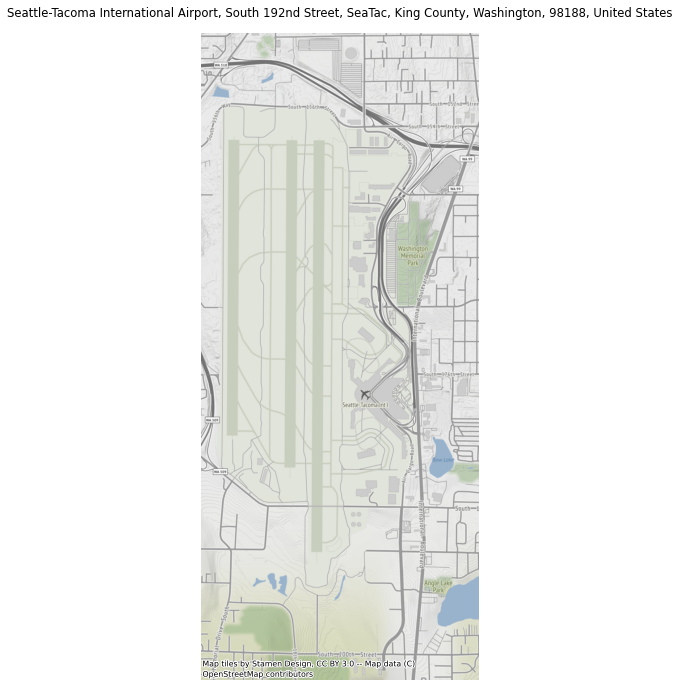

In [3]:
airport = Place(AIRPORT)
ax = airport.plot()

/home/khalo/miniconda3/envs/boeing/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/khalo/miniconda3/envs/boeing/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/home/khalo/miniconda3/envs/boeing/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/hom

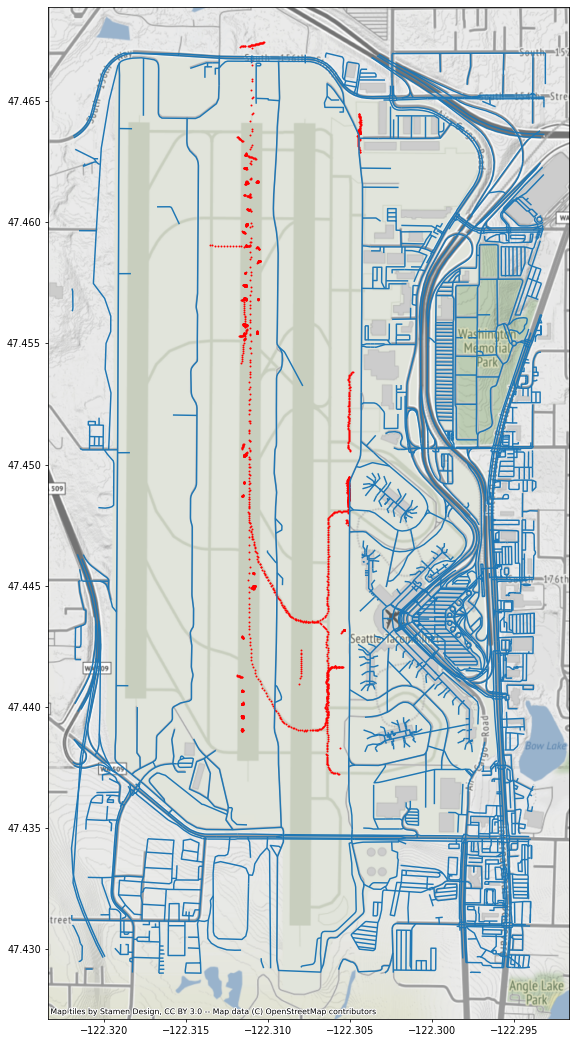

In [4]:
in_file = os.path.join(BASE_DIR, 'maps', AIRPORT, 'roads.shp')
crs = {'init':'EPSG:4326'}

fig, ax = plt.subplots(figsize = (25,15))
gdf = gpd.read_file(in_file)
gd = gdf.to_crs(epsg=4326)
gd.plot(ax=ax)
plt.tight_layout()
ctx.add_basemap(ax, crs=gdf.crs)

unique_IDs = data.ID.unique()

num_trajs = 100
for n, ID in enumerate(unique_IDs):
    if n > num_trajs:
        break

    traj = data[:][data.ID == ID]    
    # if len(traj) > 2000:
    #     lat = np.array(traj['Lat'].to_list())
    #     lon = np.array(traj['Lon'].to_list())
    #     plt.plot(lon, lat, color=f'C{i}')
    geometry = [Point(xy) for xy in zip(traj.Lon, traj.Lat)]
    gdf = GeoDataFrame(traj, geometry=geometry, crs=crs, copy = False)
    gdf.plot(ax=ax, column="ID", markersize=1, vmin =0 , vmax = 4000, color='red')
